# Intro Unsupervised Learning

![](https://media.giphy.com/media/kZJcpM3gYdlK4D64Ft/giphy.gif)

## When do we use Unsupervised Learning?

**Examples:** (When there are no labels)

+ Customer segmentation
+ Product segmentation
+ One-person segment (what works for one group doesn't necessarily work for another)
+ Grouping according to characteristics

**Situation**

Each element (user, customer, product...) can be considered a vector. Given a package of vectors, they are distributed by clusters. Similar vectors will be in the same cluster, and similar clusters will be 'closer' to each other than those that are more different.

All this proceeding assumes the existence of a distance metric, so that distance between vectors within the vector space can be measured.

**Steps to apply USL:**

+ **1**: Vector representation
+ **2**: Metric, distance function
+ **3**: Similarity measure

When creating a cluster, the vector in the center of the cluster (centroid) is considered the prototype or the most representative of the cluster.


**Problems treatable by USL:**

+ Market segmentation
+ Detection of fraud in insurance or banking
+ Response to medical treatments
+ Outlier detection

**Examples of models:**

+ K-Means
+ Hierarchical Clustering
+ DBSCAN
+ HDBSCAN
+ GMM

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Viz mantra

%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## PCA
**Main Component Analysis**
Principal Component Analysis (PCA) is a statistical method that allows simplifying the complexity of sample spaces with many dimensions while preserving their information. Suppose there is a sample with n individuals each with p variables (X1, X2, …, Xp), that is, the sample space has p dimensions. PCA allows to find a number of underlying factors (z<p) that explain approximately the same as the original p variables. Where before p values ​​were needed to characterize each individual, now z values ​​suffice. Each of these z new variables is called the principal component.

Principal Component Analysis belongs to the family of techniques known as unsupervised learning. The supervised learning methods described in previous chapters have the objective of predicting a response variable Y from a series of predictors. To do this, we have p characteristics (X1, X2 … Xp) and the response variable Y measured in n observations. In the case of unsupervised learning, the response variable Y is not taken into account since the objective is not to predict Y but to extract information using the predictors, for example, to identify subgroups. The main problem faced by unsupervised learning methods is the difficulty in validating the results given that there is no response variable available that allows them to be contrasted.

The PCA method therefore allows "condensing" the information provided by multiple variables into just a few components. This makes it a very useful method to apply after using other statistical techniques such as regression, clustering... Even so, we must not forget that it is still necessary to have the value of the original variables to calculate the components.

In [3]:
iris = sns.load_dataset("iris")

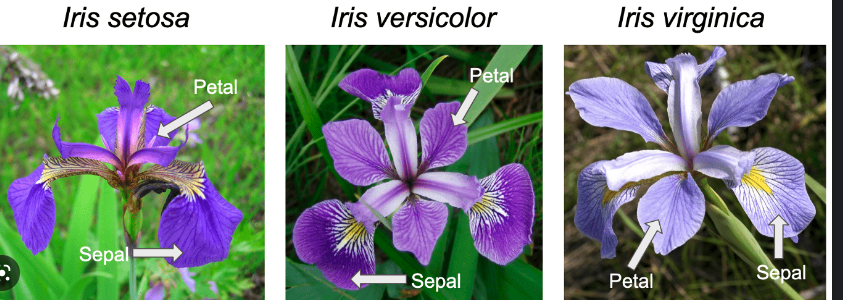

In [4]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [5]:
from sklearn.decomposition import PCA

In [9]:
sns.pairplot(iris, hue="species");

The result after doing fit_transform is that where we had 4 features we now have 2

In [15]:
pca = PCA(2)

In [16]:
iris_t = pd.DataFrame(pca.fit_transform(iris.drop(columns="species")), columns=["PC1", "PC2"])

In [19]:
iris_t

PC1       PC2
0   -2.684126  0.319397
1   -2.714142 -0.177001
2   -2.888991 -0.144949
3   -2.745343 -0.318299
4   -2.728717  0.326755
..        ...       ...
145  1.944110  0.187532
146  1.527167 -0.375317
147  1.764346  0.078859
148  1.900942  0.116628
149  1.390189 -0.282661

[150 rows x 2 columns]

## Deciding on the amount of components

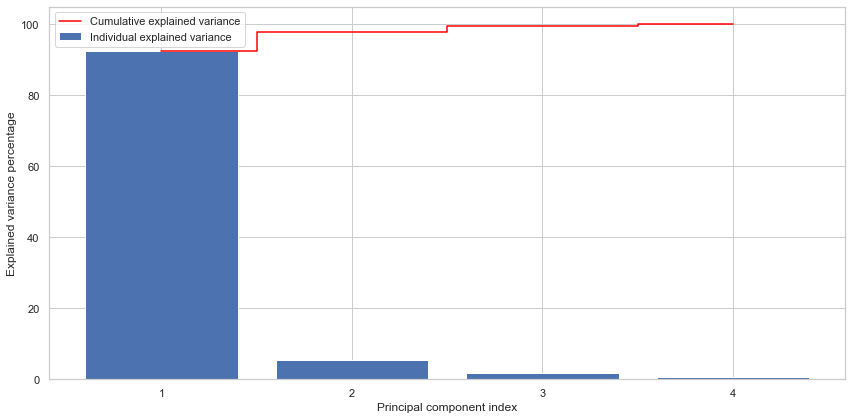

In [20]:
# Initializing
pca = PCA(n_components=None) #Number of components to keep. if n_components is not set all components are kept

pca.fit(iris.drop(columns="species"))

# Calculating variance
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

# Plotting
plt.bar(range(1, 5), exp_var, align='center',label='Individual explained variance') #bars
plt.step(range(1, 5), cum_exp_var, where='mid', label='Cumulative explained variance', color='red') #line

# Axis
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
plt.tight_layout()

pca.components has shape `[n_components, n_features]`

In [21]:
cum_exp_var

array([ 92.46187232,  97.76852063,  99.47878161, 100.        ])

`pca.components_`: Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

In [22]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [ ]:
# PCA: reducing the dimensionality of the data, to keeop it more simple
    # Two feature: explain up to 97%

## K-Means


The oldest and the most popular. The idea is to previously select how many clusters are desired ($k$). The central points of the cluster (centroids) are selected randomly. For each new record, a cluster is reassigned and the centroid (mean) is recalculated. The process is iterated until there is no change in clustering.

![kmeans](../images/kmeans.png)

![kmeans2](../images/kmeans2.png)

Wait didn't we see KNN already?

KNN is supervised for classification. K-means is unsupervised for clustering

In [23]:
from sklearn.cluster import KMeans
import pandas as pd

In [24]:
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris["species"]);

/Users/fernandocosta/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


## We standardize the data

**Since KMeans is based on distance** and our variables have very different variances, even though they have the same unit, it would be a good idea to standardize the data if we had not done PCA.
Anyway, I leave you an example of how the data would look.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
dat_ = iris.copy()

In [27]:
dat_.drop(columns="species", inplace=True)

In [28]:
dat_.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [29]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(dat_), columns=dat_.columns)
df_scaler.head()

sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444

## Train the algorithm

### K-Means with the two PCA

Since we are testing and understanding the algorithm, we are going to enter the number of clusters by hand

In [30]:
km = KMeans(n_clusters=3)
km.fit(iris_t)

KMeans(n_clusters=3)

In [31]:
y_pred = km.predict(iris_t)

In [32]:
iris_t["predict"] = y_pred

In [33]:
iris_t["real_ground_truth"] = iris["species"]

In [34]:
iris_t.sample(10)

PC1       PC2  predict real_ground_truth
42  -2.997407 -0.341926        2            setosa
101  1.415236 -0.574916        1         virginica
139  2.107611  0.372288        0         virginica
138  1.169326 -0.164990        1         virginica
111  1.803402 -0.215638        0         virginica
148  1.900942  0.116628        0         virginica
113  1.346164 -0.776818        1         virginica
62   0.264977 -0.550036        1        versicolor
24  -2.355754 -0.037282        2            setosa
20  -2.310256  0.391346        2            setosa

In [35]:
crosstab = pd.crosstab(iris_t.predict, iris_t.real_ground_truth)

In [36]:
crosstab

real_ground_truth  setosa  versicolor  virginica
predict                                         
0                       0           3         36
1                       0          47         14
2                      50           0          0

### K-Means with all the features

In [37]:
km2 = KMeans(n_clusters=3)
km2.fit(df_scaler)

KMeans(n_clusters=3)

In [38]:
y_four = km2.predict(df_scaler)

In [39]:
df_scaler["real"] = iris.species
df_scaler["kmeans"] = y_four

In [40]:
df_scaler.sample(15)

sepal_length  sepal_width  petal_length  petal_width        real  kmeans
92      -0.052506    -1.052767      0.137547     0.000878  versicolor       1
13      -1.870024    -0.131979     -1.510739    -1.447076      setosa       0
108      1.038005    -1.282963      1.160620     0.790671   virginica       2
136      0.553333     0.788808      1.046945     1.580464   virginica       2
115      0.674501     0.328414      0.876433     1.448832   virginica       2
65       1.038005     0.098217      0.364896     0.264142  versicolor       2
114     -0.052506    -0.592373      0.762758     1.580464   virginica       1
45      -1.264185    -0.131979     -1.340227    -1.183812      setosa       0
123      0.553333    -0.822570      0.649083     0.790671   virginica       1
113     -0.173674    -1.282963      0.705921     1.053935   virginica       1
121     -0.294842    -0.592373      0.649083     1.053935   virginica       1
140      1.038005     0.098217      1.046945     1.580464   virginica       2
124      1.038005     0.558611      1.103783     1.185567   virginica       2
0       -0.900681     1.019004     -1.340227    -1.315444      setosa       0
91       0.310998    -0.131979      0.478571     0.264142  versicolor       1

In [41]:
cross2 = pd.crosstab(df_scaler.kmeans, df_scaler.real)
cross2

real    setosa  versicolor  virginica
kmeans                               
0           50           0          0
1            0          39         14
2            0          11         36

In [42]:
crosstab # Crosstab with PC1 & PC2

# versicolor: 2
# setosa: 1
# virignica: 0

real_ground_truth  setosa  versicolor  virginica
predict                                         
0                       0           3         36
1                       0          47         14
2                      50           0          0

In [43]:
cross2 # Crosstab without PCA: with all 4 features

real    setosa  versicolor  virginica
kmeans                               
0           50           0          0
1            0          39         14
2            0          11         36

## Let's plot it

In [44]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris_t["predict"], ax=axs[0]);
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris_t["real_ground_truth"], ax=axs[1]);

/Users/fernandocosta/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fernandocosta/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


## We measure the model / (Silhouette Score)
silhouette punctuation
The silhouette score is a metric of the separation of the clusters.

It ranges from -1 to 1, where negative values ​​mean that the clusters are misallocated, 0 means that the clusters overlap, and 1 means that the clusters are separated and defined.

In [45]:
from sklearn.metrics import silhouette_score

### Score of the kmeans with the data WITH PCA

In [46]:
iris_t_onlypcs = iris_t.drop(columns=["predict", "real_ground_truth"])

In [47]:
silhouette_score(iris_t_onlypcs, y_pred)

0.597676421954799

### Score of the kmeans with the data WITHOUT PCA

In [48]:
df_scaler_features = df_scaler.drop(columns=["real", "kmeans"])

In [49]:
silhouette_score(df_scaler_features, y_four)

0.45994823920518646

## Elbow method
Probably the best known method, where you calculate and plot the sum of squares at each number of clusters, and there you look for a change in slope from steep to shallow to determine the optimal number of clusters. This method is inaccurate, but still potentially useful.

The elbow curve method is useful because it shows how increasing the number of clusters contributes to separating the clusters in a significant, not marginal, way. The curve indicates that additional groups beyond the third have little value. The elbow method is pretty neat, but a naive solution based on intracluster variance. The gap statistic is a more sophisticated method of dealing with data that has a distribution with no obvious clustering.

This method works as follows: the sum of squared errors within the cluster is calculated for different values ​​of K and the K is chosen for which the sum of squared errors begins to decrease. This is visible as an elbow.

Sum within a group of squared errors sounds a bit complex. Let's break it down:

The squared error for each point is the square of the point's distance from its plot, that is, its predicted cluster center.
The sum of squared errors score is the sum of these squared errors for all points.
Any distance metric can be used, such as the Euclidean distance or the Manhattan distance.
Now, to apply the elbow method and obtain the optimal number of clusters, it can be done as follows:

Compute the clustering algorithm for different values ​​of K. For example, varying K from 1 to 10 clusters.
For each K, compute the total sum of squares within the cluster.
Plot the curve of the sum of squared errors according to the number of groups K.
The location of a curve, elbow, on the graph is generally considered to be an indicator of the appropriate number of groups.

**Inertia error method**: The more variety there is between the observations in the dataset, the greater their distances from their associated centroids. The inertia or intertia, in the context of K-Means, is the sum of all the distances of the observations of a cluster to its centroid. Assuming that the objective is to reduce the sum of distances (squares) of points with their respective centroids, the lower this total sum, the better, since it will indicate a greater homogeneity in the observations belonging to the created clusters.

In [50]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(dat_)

In [51]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[681.3706, 152.34795176035792, 78.85144142614601]

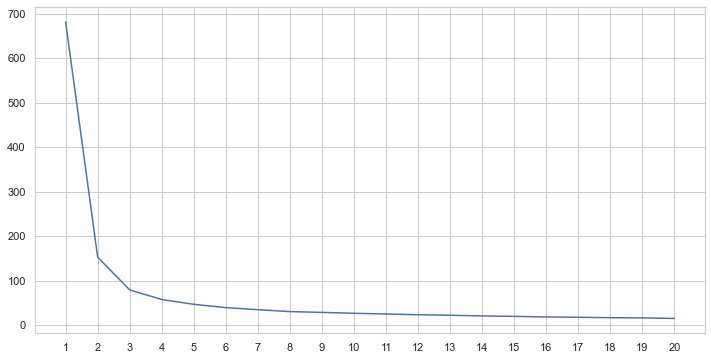

In [52]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

We see that the exact cluster point we need to do for our data is 3

## Mini-recap

- PCA
- K-means

For both of these things, we don't know how many we should start with

- PCA: cummulative variance: decide on X given PC
- K-means: elbow method, we can have the appropiate number of clusters